In [2]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, Dropout, Input
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### [1] 데이터 불러오기

In [3]:
input_length_h, input_length_w = 64, 64

In [4]:
data_generator = ImageDataGenerator(rescale = 1./255)

train_generator = data_generator.flow_from_directory(
    './data/',
    target_size = (input_length_h, input_length_w),
    batch_size = 551,
    class_mode='categorical'
)

Found 551 images belonging to 6 classes.


In [5]:
X_data, y_data = train_generator.next()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size = 0.1, stratify = y_data
)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(495, 64, 64, 3) (495, 6)
(56, 64, 64, 3) (56, 6)


In [1]:
def showXtrain(num) :
    plt.imshow(X_train[num])
    plt.show()

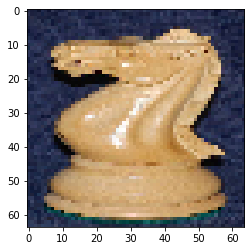

In [12]:
showXtrain(5)

---

#### [2] 모델 생성

[2] - 1 VGG 모델

In [9]:
vgg16_model = Sequential()

# 1층
vgg16_model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape = (input_length_h, input_length_w, 3), activation="relu", name = 'conv1'))
vgg16_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", name = 'conv2'))
vgg16_model.add(MaxPool2D((2, 2), name = 'pool1'))

# 2층
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", name = 'conv3'))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", name = 'conv4'))
vgg16_model.add(MaxPool2D((2, 2), name = 'pool2'))

# 3층
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name = 'conv5'))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name = 'conv6'))
vgg16_model.add(MaxPool2D((2, 2), name = 'pool3'))

# 4층
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name = 'conv7'))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name = 'conv8'))
vgg16_model.add(MaxPool2D((2, 2), name = 'pool4'))

# 5층
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu", name = 'conv9'))
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu", name = 'conv10'))
vgg16_model.add(MaxPool2D((2, 2), name = 'pool5'))

# 6층
vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu", name = 'conv11'))
vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu", name = 'conv12'))

# 출력층
vgg16_model.add(Flatten())
vgg16_model.add(Dense(4096, activation="relu", name = 'dense1'))
vgg16_model.add(Dense(2048, activation="relu", name = 'dense2'))
vgg16_model.add(Dense(6, activation="softmax", name = 'output'))

# compile
vgg16_model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

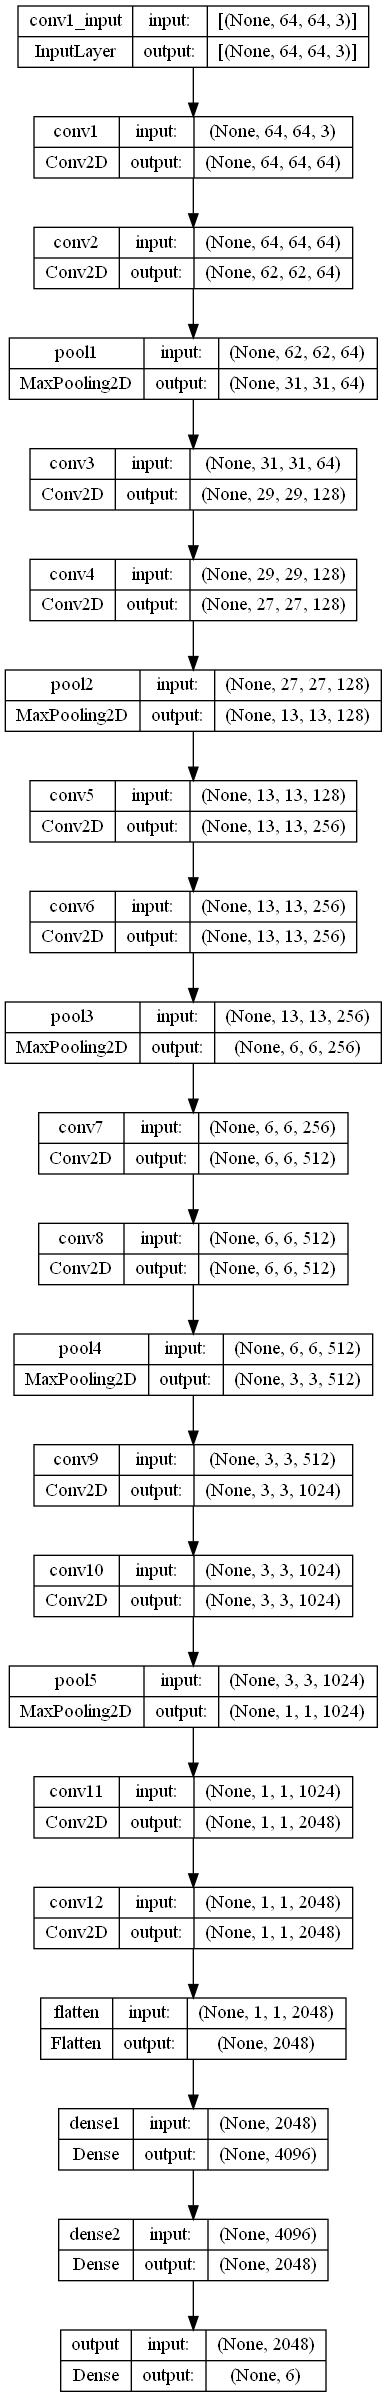

In [10]:
plot_model(vgg16_model, show_shapes = True)

In [11]:
history00 = vgg16_model.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    )

Epoch 1/15
16/16 [==============================] - 119s 7s/step - loss: 1.7907 - accuracy: 0.1758 - val_loss: 1.7809 - val_accuracy: 0.1964
Epoch 2/15
16/16 [==============================] - 119s 7s/step - loss: 1.7865 - accuracy: 0.1778 - val_loss: 1.7802 - val_accuracy: 0.1964
Epoch 3/15
16/16 [==============================] - 120s 8s/step - loss: 1.7847 - accuracy: 0.1859 - val_loss: 1.7804 - val_accuracy: 0.1964
Epoch 4/15
16/16 [==============================] - 119s 7s/step - loss: 1.7837 - accuracy: 0.1919 - val_loss: 1.7799 - val_accuracy: 0.1964
Epoch 5/15
16/16 [==============================] - 120s 7s/step - loss: 1.7835 - accuracy: 0.1899 - val_loss: 1.7798 - val_accuracy: 0.1964
Epoch 6/15
16/16 [==============================] - 115s 7s/step - loss: 1.7835 - accuracy: 0.1899 - val_loss: 1.7812 - val_accuracy: 0.1964
Epoch 7/15
16/16 [==============================] - 116s 7s/step - loss: 1.7841 - accuracy: 0.1697 - val_loss: 1.7798 - val_accuracy: 0.1964
Epoch 8/15
16

---

[2] - 2 VGG 경량 (1)

In [12]:
model01 = Sequential()

# 1층
model01.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape = (input_length_h, input_length_w, 3), activation="relu", name = 'conv1'))
model01.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name = 'conv2'))
model01.add(MaxPool2D((2, 2), name = 'pool1'))

# 2층
model01.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name = 'conv3'))
model01.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name = 'conv4'))
model01.add(MaxPool2D((2, 2), name = 'pool2'))

# 3층
model01.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name = 'conv5'))
model01.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name = 'conv6'))
model01.add(MaxPool2D((2, 2), name = 'pool3'))

# 4층
model01.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name = 'conv7'))
model01.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu", name = 'conv8'))
model01.add(MaxPool2D((2, 2), name = 'pool4'))

# 5층
model01.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu", name = 'conv9'))
model01.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu", name = 'conv10'))
model01.add(MaxPool2D((2, 2), name = 'pool5'))


# 출력층
model01.add(Flatten())
model01.add(Dense(4096, activation="relu", name = 'dense1'))
model01.add(Dense(2048, activation="relu", name = 'dense2'))
model01.add(Dense(6, activation="softmax", name = 'output'))

# compile
model01.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [13]:
history01 = model01.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    )

Epoch 1/15
16/16 [==============================] - 40s 2s/step - loss: 1.8254 - accuracy: 0.1616 - val_loss: 1.7839 - val_accuracy: 0.1964
Epoch 2/15
16/16 [==============================] - 39s 2s/step - loss: 1.7899 - accuracy: 0.1919 - val_loss: 1.7804 - val_accuracy: 0.1964
Epoch 3/15
16/16 [==============================] - 40s 3s/step - loss: 1.7858 - accuracy: 0.1879 - val_loss: 1.7810 - val_accuracy: 0.1964
Epoch 4/15
16/16 [==============================] - 40s 2s/step - loss: 1.7867 - accuracy: 0.1899 - val_loss: 1.7803 - val_accuracy: 0.1964
Epoch 5/15
16/16 [==============================] - 42s 3s/step - loss: 1.7846 - accuracy: 0.1899 - val_loss: 1.7813 - val_accuracy: 0.1964
Epoch 6/15
16/16 [==============================] - 40s 2s/step - loss: 1.7852 - accuracy: 0.1899 - val_loss: 1.7824 - val_accuracy: 0.1964
Epoch 7/15
16/16 [==============================] - 39s 2s/step - loss: 1.7859 - accuracy: 0.1899 - val_loss: 1.7796 - val_accuracy: 0.1964
Epoch 8/15
16/16 [==

---

[2] - 3 VGG 경량 (2)

In [14]:
model02 = Sequential()

# 1층
model02.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape = (input_length_h, input_length_w, 3), activation="relu", name = 'conv1'))
model02.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name = 'conv2'))
model02.add(MaxPool2D((2, 2), name = 'pool1'))

# 2층
model02.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name = 'conv3'))
model02.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu", name = 'conv4'))
model02.add(MaxPool2D((2, 2), name = 'pool2'))

# 3층
model02.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name = 'conv5'))
model02.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu", name = 'conv6'))
model02.add(MaxPool2D((2, 2), name = 'pool3'))

# 출력층
model02.add(Flatten())
model02.add(Dense(4096, activation="relu", name = 'dense1'))
model02.add(Dense(2048, activation="relu", name = 'dense2'))
model02.add(Dense(6, activation="softmax", name = 'output'))

# compile
model02.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [15]:
history02 = model02.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    )

Epoch 1/15
16/16 [==============================] - 23s 1s/step - loss: 2.0370 - accuracy: 0.1576 - val_loss: 1.7832 - val_accuracy: 0.1964
Epoch 2/15
16/16 [==============================] - 23s 1s/step - loss: 1.8143 - accuracy: 0.1919 - val_loss: 1.7869 - val_accuracy: 0.1964
Epoch 3/15
16/16 [==============================] - 22s 1s/step - loss: 1.7872 - accuracy: 0.1576 - val_loss: 1.7823 - val_accuracy: 0.1786
Epoch 4/15
16/16 [==============================] - 23s 1s/step - loss: 1.7855 - accuracy: 0.1212 - val_loss: 1.7817 - val_accuracy: 0.1964
Epoch 5/15
16/16 [==============================] - 22s 1s/step - loss: 1.7849 - accuracy: 0.1838 - val_loss: 1.7796 - val_accuracy: 0.1964
Epoch 6/15
16/16 [==============================] - 22s 1s/step - loss: 1.7838 - accuracy: 0.1778 - val_loss: 1.7806 - val_accuracy: 0.1964
Epoch 7/15
16/16 [==============================] - 22s 1s/step - loss: 1.7840 - accuracy: 0.1636 - val_loss: 1.7804 - val_accuracy: 0.1786
Epoch 8/15
16/16 [==

---

[2] - 3 VGG 경량 (3)

In [16]:
model03 = Sequential()

# 1층
model03.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape = (input_length_h, input_length_w, 3), activation="relu", name = 'conv1'))
model03.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", name = 'conv2'))
model03.add(MaxPool2D((2, 2), name = 'pool1'))

# 출력층
model03.add(Flatten())
model03.add(Dense(4096, activation="relu", name = 'dense1'))
model03.add(Dense(2048, activation="relu", name = 'dense2'))
model03.add(Dense(6, activation="softmax", name = 'output'))

# compile
model03.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [17]:
history03 = model03.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    )

Epoch 1/15
16/16 [==============================] - 27s 2s/step - loss: 10.3817 - accuracy: 0.1899 - val_loss: 1.7900 - val_accuracy: 0.1607
Epoch 2/15
16/16 [==============================] - 26s 2s/step - loss: 1.7885 - accuracy: 0.1980 - val_loss: 1.7810 - val_accuracy: 0.1964
Epoch 3/15
16/16 [==============================] - 26s 2s/step - loss: 1.7553 - accuracy: 0.2242 - val_loss: 1.7018 - val_accuracy: 0.2321
Epoch 4/15
16/16 [==============================] - 27s 2s/step - loss: 1.6450 - accuracy: 0.3293 - val_loss: 1.6406 - val_accuracy: 0.3214
Epoch 5/15
16/16 [==============================] - 26s 2s/step - loss: 1.3335 - accuracy: 0.4848 - val_loss: 1.9322 - val_accuracy: 0.3571
Epoch 6/15
16/16 [==============================] - 26s 2s/step - loss: 1.0614 - accuracy: 0.6061 - val_loss: 2.0944 - val_accuracy: 0.3571
Epoch 7/15
16/16 [==============================] - 26s 2s/step - loss: 0.7776 - accuracy: 0.7152 - val_loss: 2.8532 - val_accuracy: 0.3036
Epoch 8/15
16/16 [=

---

In [18]:
model04 = Sequential()

# 1층
model04.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", input_shape = (input_length_h, input_length_w, 3), activation="relu", name = 'conv1'))
model04.add(MaxPool2D((2, 2), name = 'pool1'))

# 출력층
model04.add(Flatten())
model04.add(Dense(4096, activation="relu", name = 'dense2'))
model04.add(Dense(6, activation="softmax", name = 'output'))

# compile
model04.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [19]:
history04 = model04.fit(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    )

Epoch 1/15
16/16 [==============================] - 22s 1s/step - loss: 20.0416 - accuracy: 0.1737 - val_loss: 3.5355 - val_accuracy: 0.1964
Epoch 2/15
16/16 [==============================] - 21s 1s/step - loss: 2.1678 - accuracy: 0.2747 - val_loss: 1.7744 - val_accuracy: 0.2679
Epoch 3/15
16/16 [==============================] - 21s 1s/step - loss: 1.5434 - accuracy: 0.4465 - val_loss: 1.6613 - val_accuracy: 0.2679
Epoch 4/15
16/16 [==============================] - 21s 1s/step - loss: 1.3143 - accuracy: 0.5596 - val_loss: 1.6209 - val_accuracy: 0.3036
Epoch 5/15
16/16 [==============================] - 21s 1s/step - loss: 1.0090 - accuracy: 0.6465 - val_loss: 1.6595 - val_accuracy: 0.3393
Epoch 6/15
16/16 [==============================] - 20s 1s/step - loss: 0.7171 - accuracy: 0.7616 - val_loss: 1.9001 - val_accuracy: 0.2857
Epoch 7/15
16/16 [==============================] - 22s 1s/step - loss: 0.5519 - accuracy: 0.8364 - val_loss: 1.9632 - val_accuracy: 0.2679
Epoch 8/15
16/16 [=

---  
---  
#### [3] 시각화

Text(0.5, 1.0, 'Model Val Accuracy')

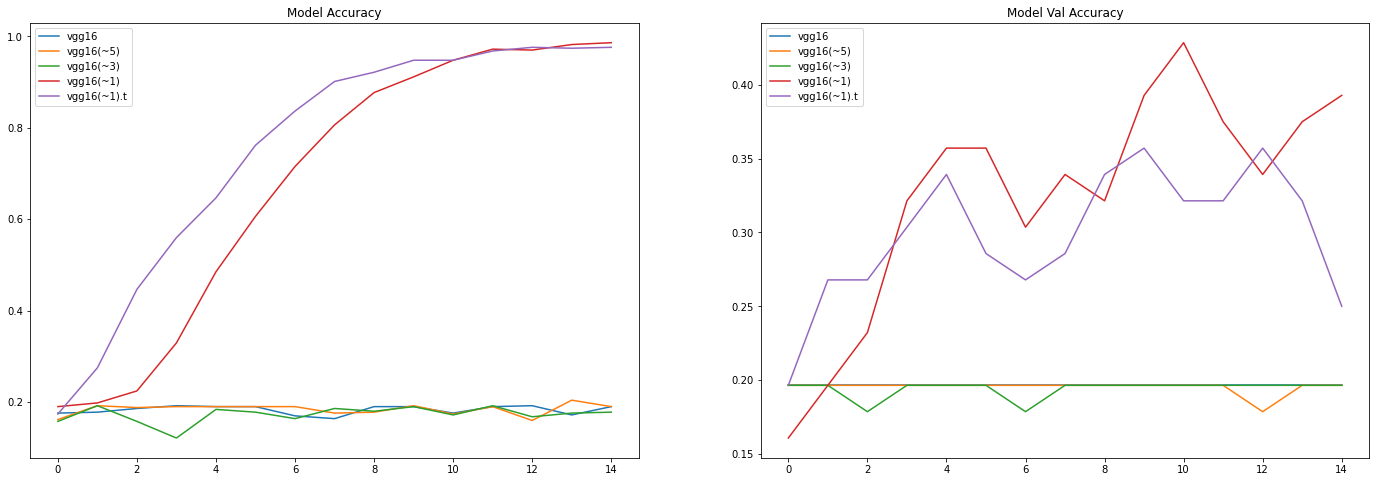

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history00.history['accuracy'], label = 'vgg16')
plt.plot(history01.history['accuracy'], label = 'vgg16(~5)')
plt.plot(history02.history['accuracy'], label = 'vgg16(~3)')
plt.plot(history03.history['accuracy'], label = 'vgg16(~1)')
plt.plot(history04.history['accuracy'], label = 'vgg16(~1).t')
plt.legend(loc = 2)
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history00.history['val_accuracy'], label = 'vgg16')
plt.plot(history01.history['val_accuracy'], label = 'vgg16(~5)')
plt.plot(history02.history['val_accuracy'], label = 'vgg16(~3)')
plt.plot(history03.history['val_accuracy'], label = 'vgg16(~1)')
plt.plot(history04.history['val_accuracy'], label = 'vgg16(~1).t')
plt.legend(loc = 2)
plt.title('Model Val Accuracy')